# Lista 9 (9 pkt.)

In [2]:
import numpy as np
import hashlib
import matplotlib.pyplot as plt
import random

## Zadanie 1 (1 pkt.)

Wczytaj dwa obrazki: 'Campin_Boze_Narodzenie1.png' oraz 'Campin_Boze_Narodzenie2.png' jeden z nich jest zgodny z oryginałem obrazu Roberta Campin a drugi jest lekko zmodyfikowany, rozponaj prawdziwy obraz obliczając jego funkcję skrótu SHA-256 i porównując ją do skrótu podanego poniżej (w postaci szesnastkowej), który odpowiada oryginałowi:

In [3]:
hash_original='2d08246bbb3a8f6b0c16b8d8effd2c783233a6a174496731dfff887bb41bc7e7'

Obrazek wczytaj za pomocą:

In [4]:
file = open('Campin_Boze_Narodzenie1.png','rb')
obraz1=file.read()
file.close()

In [5]:
hash1 = hashlib.sha256(obraz1).hexdigest()

In [6]:
file = open('Campin_Boze_Narodzenie2.png','rb')
obraz1=file.read()
file.close()

In [7]:
hash2 = hashlib.sha256(obraz1).hexdigest()

In [8]:
print(hash1==hash_original)
print(hash2==hash_original)

True
False


'rb' w powyższej funkcji oznacza, że odczytujemy binarną postać obrazu. Podobnie wczytaj drugi obraz. Do policzenia funkcji skrótu użyj biblioteki hashlib: https://docs.python.org/3/library/hashlib.html

## Zadanie 2 (2 pkt.)

Zaimplementuj funkcję $rho\_pollard()$ znajdującą kolizje w funkcji skrótu za pomocą agorytmu rho Pollarda. Wypisz przykładowe pary argumentów, które mają taki sam skrót dla funkcji $simple\_hash()$, która przyjmuje liczbę zapisaną szesnastkowo w postaci stringu i zwraca hash w postaci stringu z zapisem szesnastkowym.

In [9]:
def simple_hash(str):
    m = hashlib.sha256()
    m.update(bytes(int(str,16)))
    return m.hexdigest()[:2]

In [10]:
#

In [11]:
def rho_pollard(N):
    t="".join([random.choice('0123456789abcdef') for i in range(2)])
    h=simple_hash(t)
    h_prim = h
    collision=-1
    prev_h=h
    for i in range(N):
        prev_h=h
        prev_h_prim = h_prim
        h=simple_hash(h)
        temp=simple_hash(h_prim)
        h_prim=simple_hash(temp)
        print("h={}, hash(h)={}".format(prev_h, h))
        print("h'={}, hash(h')={}, hash(hash(h'))={}".format(prev_h_prim, temp, h_prim))
        print()
        if (h==h_prim):
            collision=i
            break
    return collision

In [12]:
for i in range(1):
    print(rho_pollard(256))
    print()

h=36, hash(h)=ea
h'=36, hash(h')=ea, hash(hash(h'))=04

h=ea, hash(h)=04
h'=04, hash(h')=df, hash(hash(h'))=9b

h=04, hash(h)=df
h'=9b, hash(h')=30, hash(hash(h'))=17

h=df, hash(h)=9b
h'=17, hash(h')=01, hash(hash(h'))=6e

h=9b, hash(h)=30
h'=6e, hash(h')=f2, hash(hash(h'))=fd

h=30, hash(h)=17
h'=fd, hash(h')=7c, hash(hash(h'))=7b

h=17, hash(h)=01
h'=7b, hash(h')=40, hash(hash(h'))=f5

h=01, hash(h)=6e
h'=f5, hash(h')=02, hash(hash(h'))=96

h=6e, hash(h)=f2
h'=96, hash(h')=1d, hash(hash(h'))=11

h=f2, hash(h)=fd
h'=11, hash(h')=0a, hash(hash(h'))=01

h=fd, hash(h)=7c
h'=01, hash(h')=6e, hash(hash(h'))=f2

h=7c, hash(h)=7b
h'=f2, hash(h')=fd, hash(hash(h'))=7c

h=7b, hash(h)=40
h'=7c, hash(h')=7b, hash(hash(h'))=40

12



In [13]:
print(simple_hash('f5')==simple_hash('37'))

True


## Zadanie 3 (2 pkt.)

Napisz funkcję $HMAC(K,M)$, która przyjmuje klucz oraz wiadomość a zwraca kod HMAC, wszystko w postaci stringu bitów. Funkcja $hash()$ to funkcja SHA256 ale przyjmująca i zwracająca dane w postaci stringu bitów. Przyjmij długość bloku 64 bity (przypadek DESa).

In [14]:
def bin2dec(bin_str):
    return int(bin_str, 2)

def dec2bin(dec_str,pad=0):
    padding = '{0:0' + str(pad) + 'b}'
    bin_string = padding.format(dec_str)
    return bin_string
    
def xor(bin_str1,bin_str2):
    length = len(bin_str1)
    int1 = bin2dec(bin_str1)
    int2 = bin2dec(bin_str2)
    return dec2bin(int1^int2,length)

In [15]:
def hash(i):
    m = hashlib.sha256()
    m.update(int(i,2).to_bytes(len(i),'little'))
    return format(int(m.hexdigest(),16),'0256b')

In [16]:
def HMAC(K,M):
    l = 64
    pad = int(64/8)
    opad = f'{0x5c:0>8b}' * pad
    ipad = f'{0x36:0>8b}' * pad
    result = hash(xor(K,opad) + hash(xor(K,ipad) + M))
    return result

In [17]:
print(len('0010111000111100100000001100001000110000100011001110011110010000'))

64


In [18]:
# def hash(i):
#     m = hashlib.sha256()
#     m.update(i.to_bytes())
#     return int(m.hexdigest(),16)

In [19]:
print(HMAC('0010111000111100100000001100001000110000100011001110011110010000','0100011001010010011011010100100100011101011101111011010000101010')
    == '1101011010010010001001010001100000001011000100001100101110111010000001000000110000001111011111110101011101111010110111001111001001001010000011110101110101010000100011110100101000111001000111000011111000011111001001110000110001111100110011110010100110000100')
print(HMAC('1000110000100011001111011101000000010001110101110011101011000110','1100110101011010110010110011001001010000000000111000011011000011')
    == '0100010101000110011101000100111010101111011110001010001001011000010001011100010100000000010010110000100010010101011011000010111000001110000101100011101100111111001000101101110011101100001111000000011111011111100001010111010011010010101100010101011100111010')
print(HMAC('0010100101111010101111100000101110110001011111100101000010001010','1110001110111101101100001010001110011101011111101010110011000000')
    == '1101010101011101110011000000111100111100100100011001011000001011101001100011011011010100110100010110101100000011010100000100111100111111100001110100000100100111100011111011000110101010000101110001110111101110011001000010001001001010010011000000111000011111')

True
True
True


Zmienne $msg\_enc1$ oraz $msg\_enc2$ zawierają dwie wiadomości. Jedna z nich jest poprawna druga ma zmieniony jeden bit. Wiemy, że wiadomośc zaszyfrowano za pomocą DESa z kluczem $key$ i nadawca dodał do niej kod HMAC zawarty w zmiennej $hmac$. Sprawdź, która z otrzymanych wiadomości jest poprawna.

In [20]:
msg_enc1 = '0110011010100110101010011000011111010000110111011011110110110101'
msg_enc2 = '0110011010100110101010011000011111010000110111010011110110110101'
key = '0001101100001110010010101101001101101010000100100000100001101100'

In [21]:
hmac = '1010011101011000110010101011100100001001110111010000110100110111001001110010001101001010000011010001001101010100000010100111110010101011001101001010101100110110000101101110100000010001101011011011110011110111011100110000011010110001110000011000011100101001'

In [22]:
print(HMAC(key,msg_enc1)==hmac)
print(HMAC(key,msg_enc2)==hmac)

True
False


## Zadanie 4 (2 pkt.)

In [23]:
def inv(p,n):
    s=0
    t=1
    old_s=1
    old_t=0
    while(n > 0):
        r = p//n
        m = p%n
        new_s = s - old_s * r
        new_t = t - old_t * r
        p,n = n,m
        s,t = old_s, old_t
        old_s, old_t = new_s, new_t
    if(t<0):
        return t+new_t 
    return t


def pow_mod(x,n,m):
    bin_n = dec2bin(n)
    p=1
    for b in bin_n:
        p=(p*p)%m
        if b == '1':
            p=(p*x)%m
    return p

def key_gen(p,q):
    n=p*q
    fi = (q-1)*(p-1)
    e=65537
    d=inv(e, fi)
    return (n,e,d)

def enc(x,e,n):
    x = int(x,16)
    y = pow_mod(x,e,n)
    return dec2hex(y)

def dec(y,d,n):
    y = int(y,16)
    x = pow_mod(y,d,n)
    return dec2hex(x)

def dec2hex(dec, pad=0):
    res = hex(dec).replace("x","")
    res = res.lstrip('0')
    res = res.zfill(pad)
    return res


Napisz funkcję $sign(file\_name, e, n)$ generującą podpis elektroniczny pliku, gdzie $file\_name$ to nazwa pliku, $e$ i $n$ to klucz prywatny algorymtu RSA, oznaczenia jak na liście 7., funkcja ma zwracać podpis w postaci stringu z zapisem szesnastkowym.

In [24]:
def sign(file_name, e, n):
    file = open(file_name,'rb')
    f=file.read()
    file.close()
    hash_f = hashlib.sha256(f).hexdigest()
    return enc(hash_f,e,n)
    

Napisz funkcję $check\_sign(file\_name, d, n, sign)$ weryfikującą autentyczność podpisu, gdzie $file\_name$ to nazwa pliku $d$ i $n$ to klucz publiczny autora podpisu a $sign$ to podpis, funkcja ma zwracać $True$ lub $False$.

In [25]:
def check_sign(file_name, d, n, sign):
    file = open(file_name,'rb')
    f=file.read()
    file.close()
    hash_f = hashlib.sha256(f).hexdigest()
    decrypted = dec(sign,d,n)
    return hash_f==decrypted

Wygeneruj klucze RSA z liczb pierwszych $p$ i $q$ i użyj ich w testach.

In [26]:
p=24130780476900131841553779066939443255102203937160657723394451174808141403858935238883126295228560935516885174421847238379397184900972008801015315248328437
q=26660613491521684005574100352062919789979599401844483402246984186988668019447679726081352452799126206997555710356464145743285983450292024894053538317854159

In [27]:
n,e,d = key_gen(p,q)

In [28]:
print(sign('correlation.png',e,n)=='1d5e7cd47f75b13159a37c8ffb3ba7d9f43a21f4758ae06e856da0a468fd1772f7b8b52d0f948fd02610e0e05a54c0fff12d7bd27575583cfdf53b124e9c0e95df1de156aa0af52239f1329ab69000b4a6a61d3d45f190c4b9df4ca4b7d30904162727353a8fb09c9faf847eeb0f6f65394d92cb57ced2cdcff36c444394e3fff')
print(sign('Campin_Boze_Narodzenie1.png',e,n)=='1c6097177871bb4873fcd0ae658d28f46fcc54e4b0e595954a57c0008f8b86c7427cecf28296240025941fe2a019b80fcc5f43c4cae6b1d2163cecf8438336d3da6e33ae326dfa2c0e5ea7bbad511dd140bc7b0cd34829623bfd02bc66bc9b43d57443b7fd950bea5cb5f5df99d8611eeb0d4458b19809e3ff86abf6538c3e453')

True
True


In [29]:
print(check_sign('correlation.png',d,n,'1d5e7cd47f75b13159a37c8ffb3ba7d9f43a21f4758ae06e856da0a468fd1772f7b8b52d0f948fd02610e0e05a54c0fff12d7bd27575583cfdf53b124e9c0e95df1de156aa0af52239f1329ab69000b4a6a61d3d45f190c4b9df4ca4b7d30904162727353a8fb09c9faf847eeb0f6f65394d92cb57ced2cdcff36c444394e3fff')==True)
print(check_sign('correlation.png',d,n,'1d5e7cd47f75b13159a37c8ffb3ba7d9f43a21f4758ae06e856ba0a468fd1772f7b8b52d0f948fd02610e0e05a54c0fff12d7bd27575583cfdf53b124e9c0e95df1de156aa0af52239f1329ab69000b4a6a61d3d45f190c4b9df4ca4b7d30904162727353a8fb09c9faf847eeb0f6f65394d92cb57ced2cdcff36c444394e3fff')==False)
print(check_sign('Campin_Boze_Narodzenie1.png',d,n,'1c6097177871bb4873fcd0ae658d28f46fcc54e4b0e595954a57c0008f8b86c7427cecf28296240025941fe2a019b80fcc5f43c4cae6b1d2163cecf8438336d3da6e33ae326dfa2c0e5ea7bbad511dd140bc7b0cd34829623bfd02bc66bc9b43d57443b7fd950bea5cb5f5df99d8611eeb0d4458b19809e3ff86abf6538c3e453')==True)
print(check_sign('Campin_Boze_Narodzenie1.png',d,n,'1c6097177871bb4873fcd0ae658d28f46fec54e4b0e595954a57c0008f8b86c7427cecf28296240025941fe2a019b80fcc5f43c4cae6b1d2163cecf8438336d3da6e33ae326dfa2c0e5ea7bbad511dd140bc7b0cd34829623bfd02bc66bc9b43d57443b7fd950bea5cb5f5df99d8611eeb0d4458b19809e3ff86abf6538c3e453')==False)

True
True
True
True


## Zadanie 5 (2 pkt.)

"Kopanie" Bitcoina polega w uproszczeniu na szukaniu liczby dla której funkcja skrótu zwraca wartość mniejszą niż pewien próg, tzn. wartośc funkcji skrótu musi zaczynać się odpowiednią liczbą zer w zapisie bitowym. Jako, że funkcja skrótu ma właściwości pseudolosowe, szukamy tej liczby sprawdzając po kolei wszystkie liczby. Napisz funkcję $mine(d)$, szukającą takiej liczby $i$ dla której $SHA256(i)$ zaczyna się w zapisie bitowym $d$ zerami. Podstawiaj kolejno liczby $0,1,2,3,...$. Funkcja ma zwracać liczbę dla której udało się spełnić warunek.

Uwaga: aby podać zmienną typu $int$ jako argument do hashlib.sha256() należy przekonwerstować ją za pomocą $bytes()$

In [39]:
def mine(diff):
    h=''
    starting_zeroes = '0' * diff
    i=0
    while(True):
        h = hashlib.sha256(bytes(i)).hexdigest()
        h = bin(int(h, 16))[2:].zfill(256)
        if(h.startswith(starting_zeroes)):
            break
        i+=1
    return i

Wykonaj funkcję $mine(d)$ dla kilkunastu wartości $d$ i narysuj wykres $plt.scatter()$ zależności $i(d)$.

Uwaga: użyj skali logarytmicznej $plt.yscale('symlog')$.

Zastanów się ile teoretycznie (średnio) należy wykonać prób aby znaleźć funkcję skrótu z $d$ zerami na początku. Narysuj na wykresie linię obrazującą tą zależność i porównaj z punktami uzyskanymi z funkcji $mine()$.

Powtórz pomiary, ale zamiast brać kolejne liczby, bierz losowe. Sprawdź czy daje to lepsze rezultaty.

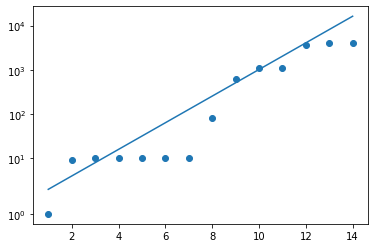

In [69]:
results=[]
theoretical=[]
iterations = range(1,15)
for i in iterations:
    results.append(mine(i))
    theoretical.append(2**i)
plt.scatter(iterations, results)
plt.plot(iterations, theoretical)
plt.yscale('symlog')

In [70]:
def mine_rand(diff):
    h=''
    rand_range=10**5
    starting_zeroes = '0' * diff
    i=0
    while(True):
        r=random.randint(0, rand_range)
        h = hashlib.sha256(bytes(r)).hexdigest()
        h = bin(int(h, 16))[2:].zfill(256)
        if(h.startswith(starting_zeroes)):
            break
        i+=1
    return i

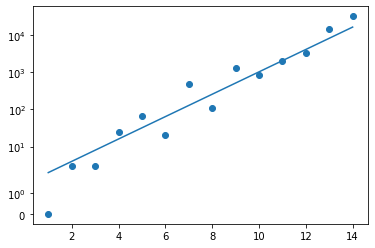

In [71]:
results=[]
theoretical=[]
iterations = range(1,15)
for i in iterations:
    results.append(mine_rand(i))
    theoretical.append(2**i)
plt.scatter(iterations, results)
plt.plot(iterations, theoretical)
plt.yscale('symlog')